<a href="https://colab.research.google.com/github/wilianfc/datasharing/blob/master/Rodar_R_e_Postgres_no_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**R no Colab**

Podemos rodar o R no Colab de 2 formas:

1) Usar o Rmagic para execurar o fragmento R em cada linha.

In [10]:
%load_ext rpy2.ipython

Depois disso, toda vez que quiser usar R, adicione %%R no início de cada célula.

In [ ]:
%%R 
x <- seq (0, 2 * pi, length.out = 50) 
x

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


Copiar a variável de R para Python

In [ ]:
x =% R x
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

2) Criar o arquivo Colab para ser R nativo

Para usar o notebook diretamente com R:

Abra seu navegador favorito.

Vá para este URL: https://colab.research.google.com/#create=true&language=r , ou este URL curto https://colab.to/r

Após acessar o URL, você será levado a um novo bloco de notas Colab com o título padrão Unitled.ipynb.

À primeira vista, não há diferença entre notebooks com tempos de execução Python e R. No entanto, se formos para as configurações de “Runtime” e selecionar “Alterar tipo de tempo de execução”, obteremos uma caixa de diálogo confirmando que já estamos em R runtime.

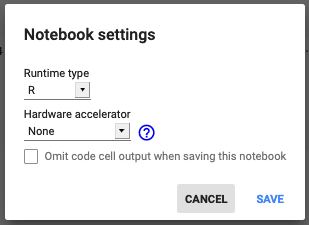

Parabéns, agora você executou com sucesso o R no Colab. Você pode verificar a versão R digitando **R.version.string** para imprimir a versão R.

**Postgres no colab:**

Para instalar o Postgres SQL:

In [4]:
# Install postgresql server
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"


debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../0-cron_3.0pl1-128.1ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-128.1ubuntu1) ...
Selecting previously unselected package logrotate.
Preparing to unpack .../1-logrotate_3.11.0-0.1ubuntu1_amd64.deb ...
Unpacking logrotate (3.11.0-0.1ubuntu1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../2-netbase_5.4_all.deb ...
Unpacking netbase (5.4) ...
Selecting previously unselected pac

In [5]:
# Setup a database with name `tfio_demo` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS denise_passador_multi;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE denise_passador_multi;'

NOTICE:  database "denise_passador_multi" does not exist, skipping
DROP DATABASE
CREATE DATABASE


Criar variaveis de ambiente para auxiliar na execução dos comendos de terminal

In [6]:
%env DATABASE_NAME=denise_passador_multi
%env DATABASE_HOST=localhost
%env DATABASE_PORT=5432
%env DATABASE_USER=postgres
%env DATABASE_PASS=postgres

env: DATABASE_NAME=denise_passador_multi
env: DATABASE_HOST=localhost
env: DATABASE_PORT=5432
env: DATABASE_USER=postgres
env: DATABASE_PASS=postgres


Fazer o download do dado para a instancia do Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install gdown

Para usar o gdown:
gdown --id {gdrive_file_id} --output {file_name}

In [ ]:
#gdown --id 15LYMzniqkFKeFSEH5eDzDzLeJMwfSpbG--output "dump-denise_passador_multi-202102040549.sql"

In [8]:
#!curl -s -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/postgresql/AirQualityUCI.sql
#!curl -s -OL "/content/drive/Shareddrives/C4AI - AgroBio/Food Security/Subprojeto-Associados/Dados_evandro_denise_passador_multi/dump-denise_passador_multi-202102040549.sql"

!PGPASSWORD=$DATABASE_PASS psql -q -h $DATABASE_HOST -p $DATABASE_PORT -U $DATABASE_USER -d $DATABASE_NAME -f "/content/drive/Shareddrives/C4AI - AgroBio/Food Security/Subprojeto-Associados/Dados_evandro_denise_passador_multi/dump-denise_passador_multi-202102040549.sql"

 set_config 
------------
 
(1 row)

psql:/content/drive/Shareddrives/C4AI - AgroBio/Food Security/Subprojeto-Associados/Dados_evandro_denise_passador_multi/dump-denise_passador_multi-202102040549.sql:26: ERROR:  schema "public" already exists
psql:/content/drive/Shareddrives/C4AI - AgroBio/Food Security/Subprojeto-Associados/Dados_evandro_denise_passador_multi/dump-denise_passador_multi-202102040549.sql:88: ERROR:  unrecognized configuration parameter "default_table_access_method"
psql:/content/drive/Shareddrives/C4AI - AgroBio/Food Security/Subprojeto-Associados/Dados_evandro_denise_passador_multi/dump-denise_passador_multi-202102040549.sql:1892436: ERROR:  syntax error at or near "FUNCTION"
LINE 1: ...E INSERT ON public.documento FOR EACH ROW EXECUTE FUNCTION p...
                                                             ^
psql:/content/drive/Shareddrives/C4AI - AgroBio/Food Security/Subprojeto-Associados/Dados_evandro_denise_passador_multi/dump-denise_passador_multi-202102040549

In [24]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(host="localhost", port = 5432, database="denise_passador_multi", user="postgres", password="postgres")

# Create a cursor object
cur = conn.cursor()

# A sample query of all data from the "vendors" table in the "suppliers" database
cur.execute("""SELECT * FROM municipio""")
query_results = cur.fetchall()
print(query_results)

cur = conn.cursor()

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table
  
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
MUNICIPIO_info = create_pandas_table("SELECT * from MUNICIPIO")
print(MUNICIPIO_info)

# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()


[('ADAMANTINA',), ('ADOLFO',), ('AGUAI',), ('AGUAS DA PRATA',), ('AGUAS DE LINDOIA',), ('AGUAS DE SANTA BARBARA',), ('AGUAS DE SAO PEDRO',), ('AGUDOS',), ('ALAMBARI',), ('ALFREDO MARCONDES',), ('ALTAIR',), ('ALTINOPOLIS',), ('ALTO ALEGRE',), ('ALUMINIO',), ('ALVARES FLORENCE',), ('ALVARES MACHADO',), ('ALVARO DE CARVALHO',), ('ALVINLANDIA',), ('AMERICANA',), ('AMERICO BRASILIENSE',), ('AMERICO DE CAMPOS',), ('AMPARO',), ('ANALANDIA',), ('ANDRADINA',), ('ANGATUBA',), ('ANHEMBI',), ('ANHUMAS',), ('APARECIDA',), ('APARECIDA DOESTE',), ('APIAI',), ('ARACARIGUAMA',), ('ARACATUBA',), ('ARACOIABA DA SERRA',), ('ARAMINA',), ('ARANDU',), ('ARAPEI',), ('ARARAQUARA',), ('ARARAS',), ('ARCO-IRIS',), ('AREALVA',), ('AREIAS',), ('AREIOPOLIS',), ('ARIRANHA',), ('ARTUR NOGUEIRA',), ('ARUJA',), ('ASPASIA',), ('ASSIS',), ('ATIBAIA',), ('AURIFLAMA',), ('AVAI',), ('AVANHANDAVA',), ('AVARE',), ('BADY BASSITT',), ('BALBINOS',), ('BALSAMO',), ('BANANAL',), ('BARAO DE ANTONINA',), ('BARBOSA',), ('BARIRI',), ('


**Acessar postgres com R**:

In [26]:
%%R 
#Criado por Wilian França Costa wilianfc@gmail.com

#instalar o devtools e Rgdal
install.packages("devtools")
install.packages("rgdal")
#baixar os sources
devtools::install_github("rstats-db/DBI")
#Instalar a partir do código fonte
install.packages("RPostgreSQL", type="source")# se solicitar o Rtools no windows baixe em https://cran.r-project.org/bin/windows/Rtools/history.html
#teste
#Connect to postgis for geospatial queries
#install.packages("RPostgreSQL")
require(RPostgreSQL)
#enviromment defaults
#p4s_geo<-"+proj=longlat +datum=WGS84"
#crs.geo<-CRS(p4s_geo)
pg_user<-"postgres"
pg_passwd<-"postgres"
pg_port<-5432
pg_host<-"localhost"
pg_dbname<-"denise_passador_multi"

#database conections
dsn<-paste("PG:dbname =", pg_dbname, "user =", pg_user, "password =",pg_passwd, "port =", pg_port, "host=", pg_host)

drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv,user=pg_user, password=pg_passwd, dbname=pg_dbname, port=pg_port, host=pg_host)

#para tabelas normais
documento_list <- postgresqlReadTable(con, 'documento')
itens_list <- postgresqlReadTable(con, 'itens')
municipio_list <- postgresqlReadTable(con, 'municipio')
tarefas_list <- postgresqlReadTable(con, 'tarefas')


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/devtools_2.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 373387 bytes (364 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [29]:
#passando a variavel para o python
#documento_list =% R documento_list
#item_list =% R itens_list
municipio_list =% R municipio_list
#tarefas_list =% R  tarefas_list

municipio_list


,municipio
1,ADAMANTINA
2,ADOLFO
3,AGUAI
4,AGUAS DA PRATA
5,AGUAS DE LINDOIA
...,...
641,VISTA ALEGRE DO ALTO
642,VITORIA BRASIL
643,VOTORANTIM
644,VOTUPORANGA


**Escolha o método que lhe form mais conveniente :)**